## Load a subset of the Amazon Reviews'23 Dataset

In [1]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=12cfa3b3a6ace7882eb5846bbe2d6f220a14960baa156daae29ec97780f7668f
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.2 MB/s eta 0:00:00


In [3]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.7 MB/s eta 0:00:00


In [4]:
!pip install datasketch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 6.7 MB/s eta 0:00:00


In [5]:
from datasets import load_dataset
import datasets

# Suppress unnecessary logging
datasets.logging.set_verbosity_error()

# Load dataset (Example: 'All_Beauty' category)
reviews = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Appliances", trust_remote_code=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

Appliances.jsonl:   0%|          | 0.00/929M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

In [6]:
print(reviews)

DatasetDict({
    full: Dataset({
        features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
        num_rows: 2128605
    })
})


In [7]:
reviews_df = reviews["full"].to_pandas()
reviews_df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Work great,work great. use a new one every month,[],B01N0TQ0OH,B01N0TQ0OH,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1519317108692,0,True
1,5.0,excellent product,Little on the thin side,[],B07DD2DMXB,B07DD37QPZ,AHWWLSPCJMALVHDDVSUGICL6RUCA,1664746863446,0,True
2,5.0,Happy customer!,"Quick delivery, fixed the issue!",[],B082W3Z9YK,B082W3Z9YK,AHZIJGKEWRTAEOZ673G5B3SNXEGQ,1607225435363,0,True
3,5.0,Amazing value,I wasn't sure whether these were worth it or n...,[],B078W2BJY8,B078W2BJY8,AFGUPTDFAWOHHL4LZDV27ERDNOYQ,1534104184306,0,True
4,5.0,Dryer parts,Easy to install got the product expected to re...,[],B08C9LPCQV,B08C9LPCQV,AELFJFAXQERUSMTXJQ6SYFFRDWMA,1620176603754,0,True


In [8]:
meta = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Appliances", trust_remote_code=True)

meta_Appliances.jsonl:   0%|          | 0.00/285M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

In [9]:
print(meta)

DatasetDict({
    full: Dataset({
        features: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
        num_rows: 94327
    })
})


In [10]:
meta_df = meta["full"].to_pandas()
meta_df.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Industrial & Scientific,"ROVSUN Ice Maker Machine Countertop, Make 44lb...",3.7,61,[【Quick Ice Making】This countertop ice machine...,[],None,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Our Point of View on the Euhomy Ic...,ROVSUN,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""ROVSUN"", ""Model Name"": ""ICM-2005"", ...",B08Z743RRD,None,None,None
1,Tools & Home Improvement,"HANSGO Egg Holder for Refrigerator, Deviled Eg...",4.2,75,"[Plastic, Practical Kitchen Storage - Our egg ...",[],None,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['10 Eggs Egg Holder for Refrigerato...,HANSGO,"[Appliances, Parts & Accessories, Refrigerator...","{""Manufacturer"": ""HANSGO"", ""Part Number"": ""HAN...",B097BQDGHJ,None,None,None
2,Tools & Home Improvement,"Clothes Dryer Drum Slide, General Electric, Ho...",3.5,18,[],"[Brand new dryer drum slide, replaces General ...",None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",GE,"[Appliances, Parts & Accessories]","{""Manufacturer"": ""RPI"", ""Part Number"": ""WE1M33...",B00IN9AGAE,None,None,None
3,Tools & Home Improvement,154567702 Dishwasher Lower Wash Arm Assembly f...,4.5,26,[MODEL NUMBER:154567702 Dishwasher Lower Wash ...,[MODEL NUMBER:154567702 Dishwasher Lower Wash ...,None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",folosem,"[Appliances, Parts & Accessories, Dryer Parts ...","{""Manufacturer"": ""folosem"", ""Part Number"": ""15...",B0C7K98JZS,None,None,None
4,Tools & Home Improvement,Whirlpool W10918546 Igniter,3.8,12,[This is a Genuine OEM Replacement Part.],[Whirlpool Igniter],25.07,"{'hi_res': [None, 'https://m.media-amazon.com/...","{'title': [], 'url': [], 'user_id': []}",Whirlpool,"[Appliances, Parts & Accessories]","{""Manufacturer"": ""Whirlpool"", ""Part Number"": ""...",B07QZHQTVJ,None,None,None


In [11]:
import pandas as pd

data = pd.merge(reviews_df, meta_df, on='parent_asin')

In [12]:
print(data.head())

   rating            title_x  \
0     5.0         Work great   
1     5.0  excellent product   
2     5.0    Happy customer!   
3     5.0      Amazing value   
4     5.0        Dryer parts   

                                                text images_x        asin  \
0              work great. use a new one every month       []  B01N0TQ0OH   
1                            Little on the thin side       []  B07DD2DMXB   
2                   Quick delivery, fixed the issue!       []  B082W3Z9YK   
3  I wasn't sure whether these were worth it or n...       []  B078W2BJY8   
4  Easy to install got the product expected to re...       []  B08C9LPCQV   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B01N0TQ0OH  AGKHLEW2SOWHNMFQIJGBECAF7INQ  1519317108692             0   
1  B07DD37QPZ  AHWWLSPCJMALVHDDVSUGICL6RUCA  1664746863446             0   
2  B082W3Z9YK  AHZIJGKEWRTAEOZ673G5B3SNXEGQ  1607225435363             0   
3  B078W2BJY8  AFGUPTDFAWOHHL4LZDV27ERDN

## Reviews, Reviewers and Products

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
review_counts = data["user_id"].value_counts()

In [15]:
freq_distribution = review_counts.value_counts().sort_index()

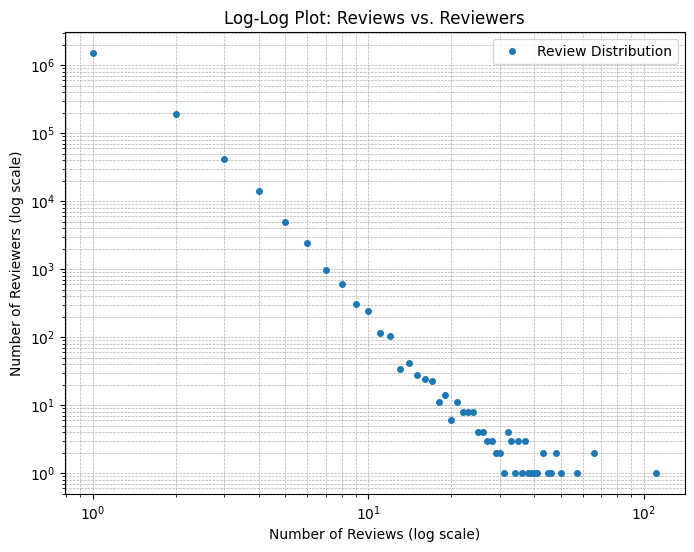

In [16]:
x = freq_distribution.index  # Number of reviews
y = freq_distribution.values  # Number of reviewers

# Plot log-log graph
plt.figure(figsize=(8, 6))
plt.loglog(x, y, marker="o", linestyle="None", markersize=4, label="Review Distribution")

plt.xlabel("Number of Reviews (log scale)")
plt.ylabel("Number of Reviewers (log scale)")
plt.title("Log-Log Plot: Reviews vs. Reviewers")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

In [17]:
review_counts = data["parent_asin"].value_counts()

freq_distribution = review_counts.value_counts().sort_index()

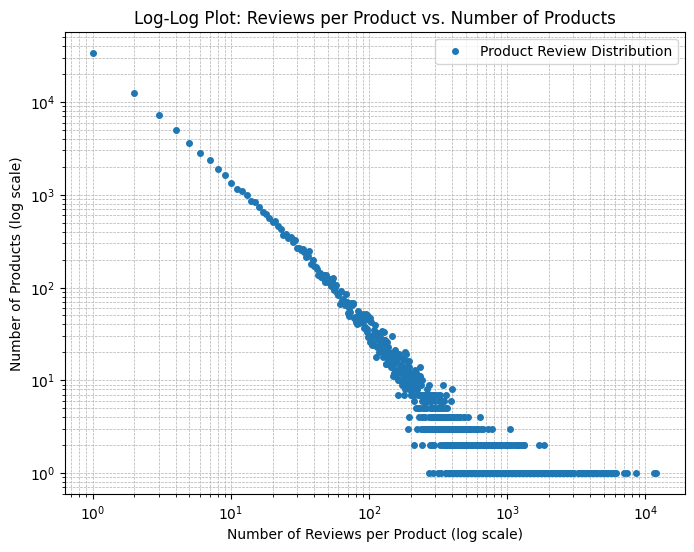

In [18]:
x = freq_distribution.index  # Number of reviews per product
y = freq_distribution.values  # Number of products

# Plot log-log graph
plt.figure(figsize=(8, 6))
plt.loglog(x, y, marker="o", linestyle="None", markersize=4, label="Product Review Distribution")

plt.xlabel("Number of Reviews per Product (log scale)")
plt.ylabel("Number of Products (log scale)")
plt.title("Log-Log Plot: Reviews per Product vs. Number of Products")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

## Duplicate Detection

In [19]:
data_spam = data[data["main_category"] == "Industrial & Scientific"].copy()

In [20]:
print(data_spam.shape)

(98586, 25)


In [21]:
data_spam.head()

,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,description,price,images_y,videos,store,categories,details,bought_together,subtitle,author
5,5.0,DO NOT purchase this ice machine.,After buying this ice machine just 15 months a...,[],B08D6RFV6D,B099ZKQJHK,AEUH4EH6XHROLT7UZPUYU2YKTYMA,1663078878875,0,True,...,"[2-in-1 ice maker, you can get ice water while...",None,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Poor fill design and not made for ...,COOLLIFE,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""COOLLIFE"", ""Model Name"": ""Counterto...",None,None,None
39,5.0,Hard to install,perfect part but difficult to install...$160 l...,[],B0792KP2G3,B0792KP2G3,AE2TA5GQH4JI5RQ4W5H5PQOVYBGA,1588985725992,0,True,...,[],12.99,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['W10181986 Range Oven Sensor Probe'...,BlueStars,"[Appliances, Parts & Accessories, Oven Parts &...","{""Brand"": ""BlueStars"", ""Item Dimensions LxWxH""...",None,None,None
48,2.0,How to install,Could not install,[],B078PTRXDR,B078PSS6SR,AFIFCPYKA56DJ26GZ6TKSN5KR6BQ,1640978312857,0,True,...,[See Compatible Part #s / Models in Item Descr...,23.99,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Why Choose An Air Filter Factory A...,Aftermarket Jenn Air,"[Appliances, Parts & Accessories, Cooktop Part...","{""Manufacturer"": ""Aftermarket Jenn Air"", ""Part...",None,None,None
52,5.0,work great,these work great and were as described and fas...,[],B07TRKGW9G,B07TRKGW9G,AHEQRHKGEACLR3RSXRQ7TUIXZGSQ,1603917257643,0,True,...,"[Specification:, Type: Digital Thermometer Hyg...",13.99,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': ['Handy Digital Thermometer', 'Says ...",Veanic,"[Appliances, Parts & Accessories, Humidifier P...","{""Brand"": ""Veanic"", ""Color"": ""Black"", ""Age Ran...",None,None,None
56,3.0,It leaking on bottom but those company is out ...,Love it but can’t replace because of company i...,[],B08QTQW9VQ,B08QTQW9VQ,AGJXTLEOLLTIX5AAGFPBZ7CNNVOQ,1656192568327,0,True,...,[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': ['Making ice. Love it', 'ice makers ...",Tobeelec,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""Tobeelec"", ""Model Name"": ""Portable ...",None,None,None


In [22]:
data_spam = data_spam[data_spam["categories"].astype(str).str.lower().str.contains("refrigerators", na=False)].copy()

In [23]:
print(data_spam.shape)

(23781, 25)


In [24]:
data_spam = data_spam.drop_duplicates(subset=["user_id", "asin", "parent_asin", "text", "title_x", "timestamp"], keep="first")

In [25]:
data_spam.head(100)

,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,description,price,images_y,videos,store,categories,details,bought_together,subtitle,author
5,5.0,DO NOT purchase this ice machine.,After buying this ice machine just 15 months a...,[],B08D6RFV6D,B099ZKQJHK,AEUH4EH6XHROLT7UZPUYU2YKTYMA,1663078878875,0,True,...,"[2-in-1 ice maker, you can get ice water while...",None,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Poor fill design and not made for ...,COOLLIFE,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""COOLLIFE"", ""Model Name"": ""Counterto...",None,None,None
56,3.0,It leaking on bottom but those company is out ...,Love it but can’t replace because of company i...,[],B08QTQW9VQ,B08QTQW9VQ,AGJXTLEOLLTIX5AAGFPBZ7CNNVOQ,1656192568327,0,True,...,[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': ['Making ice. Love it', 'ice makers ...",Tobeelec,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""Tobeelec"", ""Model Name"": ""Portable ...",None,None,None
79,4.0,Works Well,There are times when the ice maker on the refr...,[],B08R58Z27X,B08R58Z27X,AHV6QCNBJNSGLATP56JAWJ3C4G2A,1620830253561,1,False,...,[],None,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['IKT Ice Maker Makes 26.5 lbs in 24...,IKT,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""IKT"", ""Model Name"": ""IC1208"", ""Capa...",None,None,None
136,5.0,Perfect functioning icemaker freezer,"Works great, but get a air freshener for the ...",[],B07CJ962MB,B07CJ962MB,AFHGQ26ZOJJT6SN4K2M2NXCW37WQ,1584383381239,0,True,...,[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Smad,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""Smad"", ""Model Name"": ""Commercial Ic...",None,None,None
187,4.0,Fast little ice maker,This does make new ice pretty fast and takes u...,[],B08VJ6M5T3,B0C1SD4213,AFOGWJCZMC626A5IBK32HEHZB4VA,1628132964799,0,True,...,[],199.99,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['R.W.FLAME 35LB/24H Nugget Ice Make...,R.W.FLAME,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""R.W.FLAME"", ""Model Name"": ""RW-Z5815...",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,5.0,Easy to use great for summer.,[[VIDEOID:3457f0bc5605e065af4bda196658a85c]] T...,[],B09Y38R6DC,B09Y38R6DC,AHG4NPSCOBWMGKNZSWFQ2QQEXTHQ,1658302667884,6,True,...,[],299.99,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': ['Summer Must Have!', 'Easy to use g...",COSTWAY,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""COSTWAY"", ""Model Name"": ""COSTWAY"", ...",None,None,None
7292,5.0,It was a ift and my sister loves it,It came when promised and it work perfectly.,[],B097DFN6YJ,B097DFN6YJ,AH65NUNMC3GJGXYYWAJZXGS36HTA,1631571368131,1,True,...,[This Ice Cube Maker will be your kitchen’s bi...,None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Goodgojo,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""Goodgojo"", ""Model Name"": ""Portable ...",None,None,None
7467,5.0,Great,As advertised,[],B088FTFLSG,B088FT9S24,AGB6IAODJLYBGSPMGAMW6JCEXQDQ,1595851469572,0,True,...,[],79.9,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Fun to watch the ice take shape wi...,ARLIME,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""ARLIME"", ""Model Name"": ""Portable Ic...",None,None,None
7530,5.0,Awesome! BUY IT!,Best purchase ever!<br />We now have 2 because...,[],B08GSKCWTL,B0C59LGJTX,AEINDSVZ4GCMQ4ICVTLRVEVT72NA,1626617180264,5,True,...,[],199.99,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Joy Pebble Portable Nugget Ice Mak...,AGLUCKY,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""AGLUCKY"", ""Product Dimensions"": ""8....",None,None,None


In [26]:
from datasketch import MinHash, MinHashLSH

def minhash_signature(text, num_perm=128):
    m = MinHash(num_perm=num_perm)
    words = set(text.lower().split())  # Tokenize words
    for word in words:
        m.update(word.encode("utf8"))
    return m

In [27]:
lsh = MinHashLSH(threshold=0.9, num_perm=128)

minhash_dict = {}
for index, row in data_spam.iterrows():
    m = minhash_signature(row["text"])
    minhash_dict[index] = m
    lsh.insert(str(index), m)

In [60]:
duplicates = []
for i, row in data_spam.iterrows():
    m = minhash_dict[i]
    similar_items = lsh.query(m)

    for j in similar_items:
        j = int(j)  # Convert back to integer index
        if i < j:  # Avoid duplicate pairs
            m2 = minhash_dict[j]
            similarity = m.jaccard(m2)  # Compute actual Jaccard similarity
            duplicates.append((data_spam.loc[i, "user_id"], data_spam.loc[i, "parent_asin"], data_spam.loc[i, "text"], data_spam.loc[j, "user_id"], data_spam.loc[j, "parent_asin"], data_spam.loc[j, "text"], similarity))

In [61]:
duplicates_df = pd.DataFrame(duplicates, columns=["ID 1", "Product1", "text1", "ID 2", "Product2", "text2", "Similarity Score"])
duplicates_df.to_csv("duplicate_reviews.csv", index=False)

In [62]:
print(duplicates[0:100])

[('AGB6IAODJLYBGSPMGAMW6JCEXQDQ', 'B088FT9S24', 'As advertised', 'AGPRH2ZB4DBOXZ4CBBKBNE4CP3YQ', 'B08JSXK7BS', 'As advertised', 1.0), ('AFX3VYLPWYDSGZMQ7WV3AKU5S3YQ', 'B07CSLVQ2Z', 'Great ice maker', 'AHWKZVMBXEO2H4SJSN3XQXGWXAYA', 'B0BLC6Q831', 'Great ice maker', 1.0), ('AFX3VYLPWYDSGZMQ7WV3AKU5S3YQ', 'B07CSLVQ2Z', 'Great ice maker', 'AHF6IVUOLPLPMSMQ4OORRFHMRQTA', 'B0787NYMB6', 'Great ice maker', 1.0), ('AFX3VYLPWYDSGZMQ7WV3AKU5S3YQ', 'B07CSLVQ2Z', 'Great ice maker', 'AGRCVVJFJSNUKZRGPRWGUMZNRBOA', 'B09KV17R2Y', 'Great ice maker', 1.0), ('AFX3VYLPWYDSGZMQ7WV3AKU5S3YQ', 'B07CSLVQ2Z', 'Great ice maker', 'AGC7BE3EUNSJNTZL7GMPKQ5ELFVQ', 'B08H551GHQ', 'Great ice maker', 1.0), ('AFX3VYLPWYDSGZMQ7WV3AKU5S3YQ', 'B07CSLVQ2Z', 'Great ice maker', 'AEXLAGKO7YFHPYVJGIIHVKLK2LSQ', 'B0C7VHR6LM', 'Great ice maker', 1.0), ('AFX3VYLPWYDSGZMQ7WV3AKU5S3YQ', 'B07CSLVQ2Z', 'Great ice maker', 'AHHTNSOR67G6ISJYPUNHSIR2K6JA', 'B0BW8L7FJR', 'Great ice maker', 1.0), ('AHV5L4DHGNX36XCF5HIOHUFDROZA', 'B08CCPT7VJ

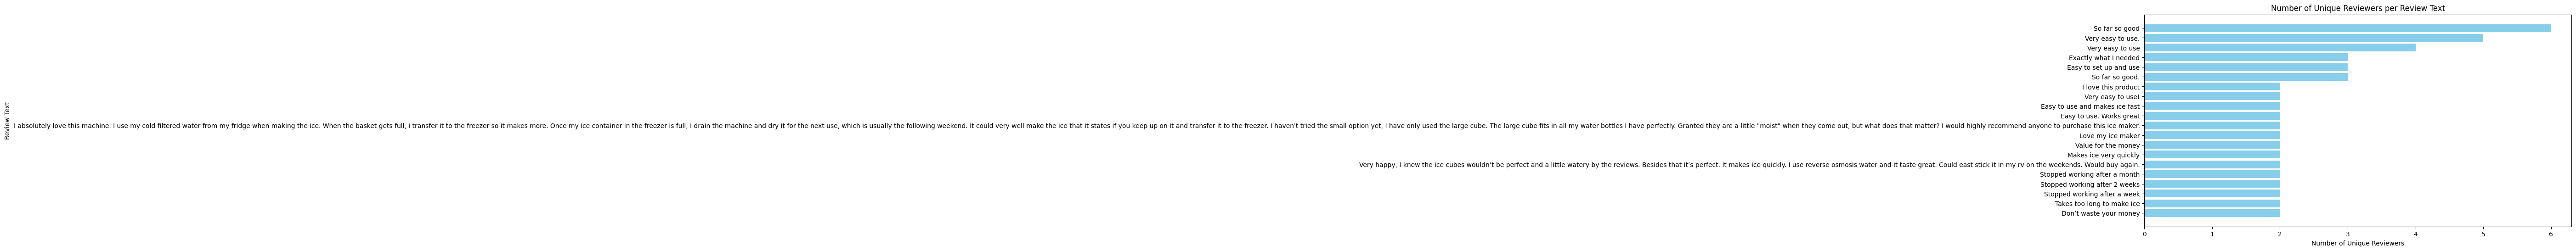

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert duplicates list into DataFrame
duplicates_df = pd.DataFrame(duplicates, columns=["ID1", "Product1", "Text1", "ID2", "Product2", "Text2", "Score"])

# Create a dictionary to store unique reviewers per text
text_to_reviewers = {}

# Add both review texts (Text1 and Text2) to the dictionary
for _, row in duplicates_df.iterrows():
    text_to_reviewers.setdefault(row["Text1"], set()).add(row["ID1"])
    text_to_reviewers.setdefault(row["Text2"], set()).add(row["ID2"])

# Convert to DataFrame
text_review_df = pd.DataFrame({
    "Review Text": list(text_to_reviewers.keys()),
    "Unique Reviewers": [len(reviewers) for reviewers in text_to_reviewers.values()]
})
text_review_df = text_review_df[text_review_df["Review Text"].str.split().str.len() >= 4]
# Sort by Unique Reviewers
text_review_df = text_review_df.sort_values(by="Unique Reviewers", ascending=False).head(20)  # Show top 20

# Plot
plt.figure(figsize=(12, 6))
plt.barh(text_review_df["Review Text"], text_review_df["Unique Reviewers"], color="skyblue")

plt.xlabel("Number of Unique Reviewers")
plt.ylabel("Review Text")
plt.title("Number of Unique Reviewers per Review Text")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert duplicates list into DataFrame
# duplicates_df = pd.DataFrame(duplicates, columns=["ID1", "Text1", "ID2", "Text2", "Score"])

# Create a dictionary to store unique reviewers per text
text_to_reviewers = {}

# Add both review texts (Text1 and Text2) to the dictionary
for _, row in duplicates_df.iterrows():
    text_to_reviewers.setdefault(row["Text1"], set()).add(row["ID1"])
    text_to_reviewers.setdefault(row["Text2"], set()).add(row["ID2"])

# Convert to DataFrame and filter reviews with at least 3 words
text_review_df = pd.DataFrame({
    "Review Text": list(text_to_reviewers.keys()),
    "Unique Reviewers": [len(reviewers) for reviewers in text_to_reviewers.values()]
})

# Filter out reviews with fewer than 3 words
text_review_df = text_review_df[text_review_df["Review Text"].str.split().str.len() >= 3]

# Sort by Unique Reviewers
text_review_df = text_review_df.sort_values(by="Unique Reviewers", ascending=False).head(40)  # Show top 40
print(text_review_df)

# Plot
# plt.figure(figsize=(12, 6))
# plt.barh(text_review_df["Review Text"], text_review_df["Unique Reviewers"], color="skyblue")

# plt.xlabel("Number of Unique Reviewers")
# plt.ylabel("Review Text")
# plt.title("Number of Unique Reviewers per Review Text (≥ 3 words)")
# plt.gca().invert_yaxis()  # Invert y-axis for better readability
# plt.show()


                                           Review Text  Unique Reviewers
42                                         Easy to use                34
136                                          I love it                16
131                                       Easy to use.                 8
1                                      Great ice maker                 7
133                                    Easy to install                 6
20                                      So far so good                 6
43                                         easy to use                 5
167                                  Very easy to use.                 5
109                                   Very easy to use                 4
18                                          We love it                 4
59                                    Great ice maker.                 4
30                                   Makes ice quickly                 4
126                             Easy to set up and 

In [66]:
# Create lists for each category
diff_users_same_product = []
same_user_diff_products = []
diff_users_diff_products = []

# Loop through duplicates and categorize them
for _, row in duplicates_df.iterrows():
    asin1 = row["Product1"]
    asin2 = row["Product2"]

    user1 = row["ID1"]
    user2 = row["ID2"]
    if user1 != user2 and asin1 == asin2:
        diff_users_same_product.append(row)
    elif user1 == user2 and asin1 != asin2:
        same_user_diff_products.append(row)
    elif user1 != user2 and asin1 != asin2:
        diff_users_diff_products.append(row)

# Convert to DataFrame
df_diff_users_same_product = pd.DataFrame(diff_users_same_product, columns=duplicates_df.columns)
df_same_user_diff_products = pd.DataFrame(same_user_diff_products, columns=duplicates_df.columns)
df_diff_users_diff_products = pd.DataFrame(diff_users_diff_products, columns=duplicates_df.columns)

# Display counts
print("Different Users, Same Product:", len(df_diff_users_same_product))
print("Same User, Different Products:", len(df_same_user_diff_products))
print("Different Users, Different Products:", len(df_diff_users_diff_products))


Different Users, Same Product: 151
Same User, Different Products: 8
Different Users, Different Products: 7014


In [34]:
print(data_spam[data_spam["user_id"] == "AHS4BYHJ4ACR5X5TQGF2AOVX3DTA"])

        rating      title_x                             text images_x  \
109557     5.0     Perfect!  Just as expected! works great!!       []   
109558     5.0       Great!  Just as expected! works great!!       []   
109563     5.0  Perfecto!!!  Just as expected! works great!!       []   

              asin parent_asin                       user_id      timestamp  \
109557  B07MC2D21V  B07MC2D21V  AHS4BYHJ4ACR5X5TQGF2AOVX3DTA  1606006834969   
109558  B07H19S4Z9  B07H19S4Z9  AHS4BYHJ4ACR5X5TQGF2AOVX3DTA  1606006777728   
109563  B08CMNXHLC  B08CMNXHLC  AHS4BYHJ4ACR5X5TQGF2AOVX3DTA  1606006505292   

        helpful_vote  verified_purchase  ... description price  \
109557             0               True  ...          []  7.95   
109558             1               True  ...          []  None   
109563             0               True  ...          []  9.99   

                                                 images_y  \
109557  {'hi_res': ['https://m.media-amazon.com/images...   
109

In [35]:
print(data_spam[data_spam["user_id"] == "AH3BMSSP3H4PHUD3XJTF25DQTFHQ"])
print(data_spam[data_spam["user_id"] == "AHQA26BDMRLY4ZQRICQXAZFNCQKA"])

         rating             title_x  \
2080117     5.0  Great ice machine!   

                                                      text images_x  \
2080117  This ice maker is fantastic! It makes such cru...       []   

               asin parent_asin                       user_id      timestamp  \
2080117  B096Y3CRJJ  B096Y3CRJJ  AH3BMSSP3H4PHUD3XJTF25DQTFHQ  1626230292205   

         helpful_vote  verified_purchase  ... description price  \
2080117             2              False  ...          []  None   

                                                  images_y  \
2080117  {'hi_res': ['https://m.media-amazon.com/images...   

                                          videos store  \
2080117  {'title': [], 'url': [], 'user_id': []}   FZF   

                                                categories  \
2080117  [Appliances, Refrigerators, Freezers & Ice Mak...   

                                                   details bought_together  \
2080117  {"Brand": "FZF", "Model Name

In [36]:
print(data_spam[data_spam["user_id"] == "AFZIT5UC7HSXF7H5JIR6AYCNDIQQ"])
print(data_spam[data_spam["user_id"] == "AEERZDMIEKKCQ53L4NNWZN7DOMGQ"])

         rating                     title_x  \
1193148     5.0  highly recommend ice maker   

                                                      text images_x  \
1193148  I absolutely love this machine. I use my cold ...       []   

               asin parent_asin                       user_id      timestamp  \
1193148  B08544SNNP  B08544SNNP  AFZIT5UC7HSXF7H5JIR6AYCNDIQQ  1627868205695   

         helpful_vote  verified_purchase  ... description price  \
1193148             0               True  ...          []  None   

                                                  images_y  \
1193148  {'hi_res': ['https://m.media-amazon.com/images...   

                                                    videos    store  \
1193148  {'title': ['BOSCARE Ice Maker Machine for Coun...  BOSCARE   

                                                categories  \
1193148  [Appliances, Refrigerators, Freezers & Ice Mak...   

                                                   details bought_togethe

## Anomaly Detection

### Perform Sentiment Analysis

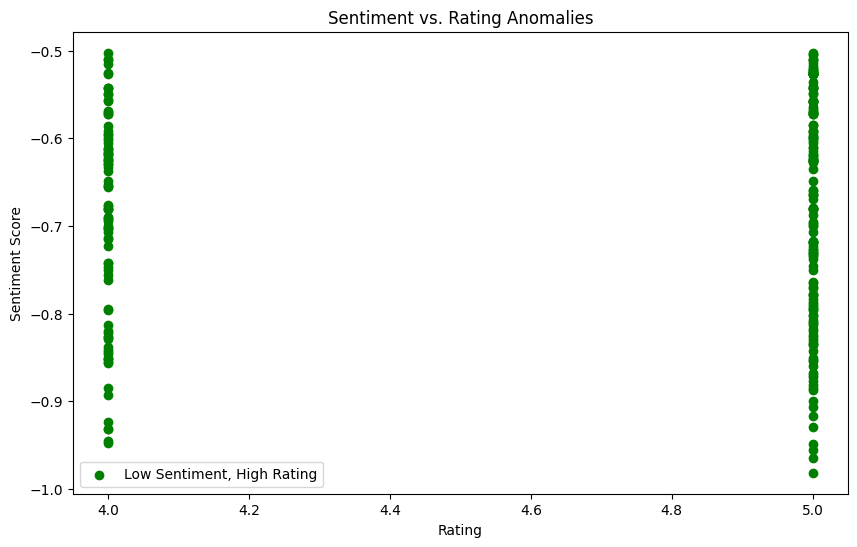

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Compute sentiment scores
data_spam["sentiment_score"] = data_spam["text"].apply(lambda x: analyzer.polarity_scores(str(x))["compound"])

# Detect anomalies using Z-score method
data_spam["z_score"] = zscore(data_spam["sentiment_score"])
high_sentiment_low_rating = data_spam[(data_spam["sentiment_score"] > 0.5) & (data_spam["rating"] <= 2)]
low_sentiment_high_rating = data_spam[(data_spam["sentiment_score"] < -0.5) & (data_spam["rating"] >= 4)]

anomalies = pd.concat([high_sentiment_low_rating, low_sentiment_high_rating])
# Plot sentiment distribution
plt.figure(figsize=(10, 6))
plt.scatter(low_sentiment_high_rating["rating"], low_sentiment_high_rating["sentiment_score"],
            color="green", label="Low Sentiment, High Rating")
plt.xlabel("Rating")
plt.ylabel("Sentiment Score")
plt.title("Sentiment vs. Rating Anomalies")
plt.legend()
plt.show()


In [38]:
print(low_sentiment_high_rating[10:20])

        rating                                    title_x  \
68167      5.0                                great value   
71060      5.0                                     RV ice   
75995      4.0               Good machine but not perfect   
76066      4.0                              I'd buy again   
83208      4.0    Nice Machine, But Broke within 2 months   
83823      5.0                               Disappointed   
89140      4.0                                       Nice   
144983     5.0       Revised Review - not a good machine!   
156394     4.0                           Nice ice machine   
163138     4.0  makes ice easy but slow to build much up.   

                                                     text  \
68167                  Helped to diagnose bad compressor.   
71060   We tried it out for a couple of days at home a...   
75995   Update... Sent machine back a 3 few weeks ago ...   
76066   This is a nice ice maker.  It works well.<br /...   
83208   Update: The mer

### Topic Modeling - LDA

In [69]:
import pandas as pd
import re
import gensim
import numpy as np
import matplotlib.pyplot as plt
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models.ldamodel import LdaModel
from collections import Counter

In [40]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
def preprocess(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenize
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return words

In [42]:
filtered_data = data_spam[(data_spam["rating"] == 5) & (data_spam["text"].str.len() >= 150)]

In [68]:
filtered_data.shape

(3624, 29)

In [43]:
filtered_data.head()

,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,images_y,videos,store,categories,details,bought_together,subtitle,author,sentiment_score,z_score
5,5.0,DO NOT purchase this ice machine.,After buying this ice machine just 15 months a...,[],B08D6RFV6D,B099ZKQJHK,AEUH4EH6XHROLT7UZPUYU2YKTYMA,1663078878875,0,True,...,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Poor fill design and not made for ...,COOLLIFE,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""COOLLIFE"", ""Model Name"": ""Counterto...",None,None,None,-0.7896,-2.264306
136,5.0,Perfect functioning icemaker freezer,"Works great, but get a air freshener for the ...",[],B07CJ962MB,B07CJ962MB,AFHGQ26ZOJJT6SN4K2M2NXCW37WQ,1584383381239,0,True,...,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Smad,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""Smad"", ""Model Name"": ""Commercial Ic...",None,None,None,0.7667,0.709739
1006,5.0,Easy to use and makes ice quick!,This makes ice pretty quickly and isn't that l...,[],B09YLYYHZN,B09YLYYHZN,AE7YYSYFEWAYIUCAK4W33CHPP4JQ,1659080872857,0,False,...,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",ecozy,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""ecozy"", ""Model Name"": ""IM-SS440A"", ...",None,None,None,0.9228,1.008042
1009,5.0,Good quality machine. Makes ice in like 5 minu...,"This makes the cutest little ice cubs, I think...",[],B08YPQ5VGZ,B0BWHKFM44,AE7YYSYFEWAYIUCAK4W33CHPP4JQ,1627052586720,1,False,...,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['VECYS countertop ice maker IC1209 ...,VECYS,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""VECYS"", ""Model Name"": ""Portable Ice...",None,None,None,0.9924,1.141046
1113,5.0,Good for office / travel,This is a great little counter-friendly ice ma...,"[{'attachment_type': 'IMAGE', 'large_image_url...",B0B21LMJD8,B0B7J1ZJPL,AGDSEYGSA5K664EUHWKV3ARDXO2Q,1656371060279,2,False,...,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Ice maker machine that makes every...,TRUSTECH,"[Appliances, Refrigerators, Freezers & Ice Mak...","{""Brand"": ""TRUSTECH"", ""Model Name"": ""Ice Maker...",None,None,None,0.9634,1.085627


In [44]:
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel, TfidfModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import string

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# Text Preprocessing Function
def preprocess_text(text):
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()

    # Tokenize, lower case, remove punctuation
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]  # Keep only words

    # Remove stopwords & lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return tokens

# Apply preprocessing
texts = filtered_data["text"].dropna().apply(preprocess_text).iloc[:100].tolist()

if len(texts) < 4:  # Ensure sufficient data
    print(f"Not enough reviews in category for LDA.")
else:
    # Create dictionary & corpus
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Apply TF-IDF transformation
    tfidf_model = TfidfModel(corpus, id2word=dictionary)
    corpus_tfidf = tfidf_model[corpus]  # Apply TF-IDF transformation

    # Define number of topics K
    num_topics = 100
    alpha = num_topics / len(dictionary)  # Ensuring sum(α) = K
    beta = 0.01  # Fixed as per research

    # Train LDA model using TF-IDF-weighted corpus
    lda_model = LdaModel(
        corpus=corpus_tfidf,  # Use TF-IDF transformed corpus
        id2word=dictionary,
        num_topics=num_topics,
        alpha=alpha,
        eta=beta,
        passes=10,
        random_state=42
    )

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [45]:
print("\nTop topics for Appliances:")
topics = lda_model.show_topics(num_topics=-1, num_words= 10, formatted=False)
for topic_id, words in topics:
    word_list = ", ".join([word for word, _ in words])
    print(f"Topic {topic_id}: {word_list}")


Top topics for Appliances:
Topic 0: br, make, machine, cube, one, maker, freezer, good, water, easy
Topic 1: rather, bullet, plug, feel, type, br, timer, drain, batch, move
Topic 2: br, water, love, one, machine, use, quickly, make, cube, basket
Topic 3: definitely, thought, mixed, birthday, gatorade, softer, held, mom, literally, chewing
Topic 4: stick, knife, gallon, summer, store, together, working, problem, every, break
Topic 5: review, helpful, honest, party, writing, home, wherever, knock, outdoor, decision
Topic 6: br, catcher, coloring, stainless, steel, reuses, pro, con, black, less
Topic 7: price, amazing, move, either, went, conventional, downfall, fairly, eating, purchase
Topic 8: buy, useful, rv, forth, hauling, awesome, ever, purchase, back, best
Topic 9: exactly, yes, location, example, placed, sleeping, course, misnomer, removing, family
Topic 10: espresso, information, mind, happens, research, cycled, misnomer, add, important, recycled
Topic 11: piece, shelf, odor, fu

In [47]:
import nltk
import pandas as pd
from nltk import pos_tag, word_tokenize
from langdetect import detect
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure NLTK resources are downloaded
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

# Spanish detection function
def is_spanish(word):
    try:
        return detect(word) == "es"
    except:
        return False  # If detection fails, assume it's not Spanish

# Load the corpus (all reviews or documents)
corpus = filtered_data["text"].dropna().tolist()

# Compute TF-IDF scores for all words
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Function to get TF-IDF score of words in a topic
def get_tfidf_scores(topic_words):
    """Returns a dictionary of {word: tfidf_score} for words in a topic."""
    tfidf_vector = tfidf_vectorizer.transform([" ".join(topic_words)])
    return {feature_names[i]: tfidf_vector[0, i] for i in range(len(feature_names))}

# Define classification keywords
RR_KEYWORDS = {"recommend", "recommendation", "look", "refer", "suggest", "advise", "endorse", "mention", "inform", "ride", "submission", "concerned", "related", "endorsing", "endorsement", "pertain", "advocacy"
, "enjoinder", "urge", "urging", "exhort", "exhorted", "exhorting", "counsel", "consult", "praise", "suggestion", "priority", "concern", "relate", "reference", "recommended", "highly", "great", "satisfied"}
abstract_nouns = {
    # Emotion & Feelings
    "love", "happiness", "joy", "satisfaction", "excitement", "passion",
    "disappointment", "anger", "frustration", "regret", "like", "br", "ice"

    # Judgment & Opinion
    "perfection", "excellence", "quality", "beauty", "elegance", "success",
    "failure", "disaster", "mistake", "worthlessness",

    # Experience & Perception
    "feeling", "impression", "vibe", "atmosphere", "sensation", "aura",
    "presence", "perspective", "memory", "easy",

    # Excessive Praise or Criticism
    "best", "worst", "amazing", "awful", "incredible", "unbelievable",
    "spectacular", "horrible", "fantastic", "disgusting",

    # Generalization & Vagueness
    "everything", "nothing", "something", "thing", "stuff", "problem",
    "solution", "situation", "process", "effect", "cube", "make", "maker"
}

# Function to categorize topic words using POS tagging and TF-IDF weighting
def categorize_topic_words(topic_words):
    categories = {"CE": 0, "DI": 0, "GC": 0, "CA": 0, "RR": 0}

    filtered_words = [word for word in topic_words if not is_spanish(word)]
    pos_tags = pos_tag(filtered_words)
    tfidf_scores = get_tfidf_scores(filtered_words)  # Get TF-IDF values

    for word, tag in pos_tags:
        word_lower = word.lower()
        tfidf_weight = tfidf_scores.get(word_lower, 1)  # Default weight = 1

        if word_lower in RR_KEYWORDS:
            categories["RR"] += 1

        if tag in ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"] and word not in RR_KEYWORDS and word not in abstract_nouns:
            categories["CE"] += 1
        if tag in ["NN"] and (word not in RR_KEYWORDS and word not in abstract_nouns):
            categories["DI"] += 1
        if (tag in ["JJ"] and word not in RR_KEYWORDS) or word in abstract_nouns:
            categories["GC"] += 1
        if tag in ["JJR", "RBR", "JJS", "RBS"] and word not in RR_KEYWORDS:
            categories["CA"] += 1

    # Normalize category scores
    total_score = sum(categories.values())
    if total_score > 0:
        for key in categories:
            categories[key] /= total_score

    return categories

# Function to classify topic as Truthful (1) or Fake (-1)
def classify_topic(category_counts):
    if category_counts["CE"] + category_counts["DI"] > category_counts["GC"] + category_counts["CA"] + category_counts["RR"]:
        return 1  # Truthful
    else:
        return -1  # Fake

# Get topics from LDA
topics = lda_model.show_topics(num_topics=-1, num_words=10, formatted=False)
topic_data = []

# Process each topic
for topic_id, words in topics:
    topic_words = [word for word, _ in words]
    category_counts = categorize_topic_words(topic_words)
    classification = classify_topic(category_counts)

    topic_data.append([topic_id, ", ".join(topic_words),
                       category_counts["CE"], category_counts["DI"],
                       category_counts["GC"], category_counts["CA"], category_counts["RR"],
                       classification])

    print(f"Topic {topic_id}: {', '.join(topic_words)}")
    print(f"Category Counts: {category_counts}")
    print(f"Classification: {classification}\n")

# Convert to DataFrame
df = pd.DataFrame(topic_data, columns=["Topic ID", "Words", "CE", "DI", "GC", "CA", "RR", "Class"])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Topic 0: br, make, machine, cube, one, maker, freezer, good, water, easy
Category Counts: {'CE': 0.0, 'DI': 0.3333333333333333, 'GC': 0.6666666666666666, 'CA': 0.0, 'RR': 0.0}
Classification: -1

Topic 1: rather, bullet, plug, feel, type, br, timer, drain, batch, move
Category Counts: {'CE': 0.1111111111111111, 'DI': 0.6666666666666666, 'GC': 0.2222222222222222, 'CA': 0.0, 'RR': 0.0}
Classification: 1

Topic 2: br, water, love, one, machine, use, quickly, make, cube, basket
Category Counts: {'CE': 0.0, 'DI': 0.5, 'GC': 0.5, 'CA': 0.0, 'RR': 0.0}
Classification: -1

Topic 3: definitely, thought, mixed, birthday, gatorade, softer, held, mom, literally, chewing
Category Counts: {'CE': 0.5, 'DI': 0.125, 'GC': 0.125, 'CA': 0.25, 'RR': 0.0}
Classification: 1

Topic 4: stick, knife, gallon, summer, store, together, working, problem, every, break
Category Counts: {'CE': 0.125, 'DI': 0.625, 'GC': 0.25, 'CA': 0.0, 'RR': 0.0}
Classification: 1

Topic 5: review, helpful, honest, party, writing, ho

In [48]:
# Save as CSV
df.to_csv("topic_classifications.csv", index=False)

print("✅ Saved topic classifications to topic_classifications.csv!")

✅ Saved topic classifications to topic_classifications.csv!


In [49]:
df = pd.read_csv("topic_classifications.csv")

In [50]:
df.head()

,Topic ID,Words,CE,DI,GC,CA,RR,Class
0,0,"br, make, machine, cube, one, maker, freezer, ...",0.000000,0.333333,0.666667,0.00,0.0,-1
1,1,"rather, bullet, plug, feel, type, br, timer, d...",0.111111,0.666667,0.222222,0.00,0.0,1
2,2,"br, water, love, one, machine, use, quickly, m...",0.000000,0.500000,0.500000,0.00,0.0,-1
3,3,"definitely, thought, mixed, birthday, gatorade...",0.500000,0.125000,0.125000,0.25,0.0,1
4,4,"stick, knife, gallon, summer, store, together,...",0.125000,0.625000,0.250000,0.00,0.0,1


In [51]:
topic_word_matrix = lda_model.get_topics()

# Number of words in each topic
num_words_per_topic = [np.count_nonzero(topic) for topic in topic_word_matrix]

print(num_words_per_topic)

[1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221, 1221]


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Encode labels (Truthful → 1, Fake → 0)
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])

# Features (CE, DI, GC, CA, RR) and Labels (Class)
X = df[["CE", "DI", "GC", "CA", "RR"]]
y = df["Class"]

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred = svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ SVM Model Trained! Accuracy: {accuracy:.2f}")


✅ SVM Model Trained! Accuracy: 0.95


In [53]:
import numpy as np
from nltk import word_tokenize, pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Function to count POS-based categories
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_data["text"].dropna())

# # Create dictionary mapping words to their TF-IDF scores
# def get_tfidf_scores(review_text):
#     """Returns a dictionary of {word: tfidf_score} for a given review."""
#     tfidf_vector = tfidf_vectorizer.transform([review_text])
#     feature_names = tfidf_vectorizer.get_feature_names_out()
#     return {feature_names[i]: tfidf_vector[0, i] for i in range(len(feature_names))}

# Function to count POS-based categories with TF-IDF weighting
def get_word_category_counts(review_text):
    if pd.isna(review_text):  # Handle NaN values
        return {"CE": 0, "DI": 0, "GC": 0, "CA": 0, "RR": 0}
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()

    # Tokenize, lower case, remove punctuation
    tokens = word_tokenize(review_text.lower())
    tokens = [word for word in tokens if word.isalpha()]  # Keep only words

    # Remove stopwords & lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    pos_tags = pos_tag(tokens)  # POS tagging
    # tfidf_scores = get_tfidf_scores(review_text)  # Get TF-IDF scores

    # Initialize category counts
    categories = {"CE": 0, "DI": 0, "GC": 0, "CA": 0, "RR": 0}

    for word, tag in pos_tags:
        word_lower = word.lower()
        # tfidf_weight = tfidf_scores.get(word_lower, 1)  # Default weight = 1

        if word_lower in RR_KEYWORDS:
            categories["RR"] += 1

        if tag in ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"] and word not in RR_KEYWORDS and word not in abstract_nouns:
            categories["CE"] += 1
        if tag in ["NN"] and (word not in RR_KEYWORDS and word not in abstract_nouns):
            categories["DI"] += 1
        if (tag in ["JJ"] and word not in RR_KEYWORDS) or word in abstract_nouns:
            categories["GC"] += 1
        if tag in ["JJR", "RBR", "JJS", "RBS"] and word not in RR_KEYWORDS:
            categories["CA"] += 1
    # Normalize counts to avoid bias for longer reviews
    total_score = sum(categories.values())
    if total_score > 0:
        for key in categories:
            categories[key] /= total_score

    return categories


# Apply function to each review
def classify_review(review_text):
    category_counts = get_word_category_counts(review_text)

    # Convert to feature vector
    X_test_review = np.array([[category_counts["CE"], category_counts["DI"],
                               category_counts["GC"], category_counts["CA"],
                               category_counts["RR"]]])

    X_test_review_df = pd.DataFrame(X_test_review, columns=["CE", "DI", "GC", "CA", "RR"])
    # Predict with trained SVM model
    prediction = svm_model.predict(X_test_review_df)

    return "Truthful" if prediction[0] == 1 else "Fake"

# Create new column for prediction
filtered_data["Review_Prediction"] = filtered_data["text"].apply(classify_review)

# Display the updated DataFrame
print(filtered_data["Review_Prediction"])

filtered_data.to_csv("filtered_reviews_with_predictions.csv", index=False)

print("✅ Saved predictions to 'filtered_reviews_with_predictions.csv'")

<ipython-input-53-964ea88274f0>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Review_Prediction"] = filtered_data["text"].apply(classify_review)


5          Truthful
136        Truthful
1006       Truthful
1009       Truthful
1113           Fake
             ...   
2127898    Truthful
2127899        Fake
2127981    Truthful
2128517    Truthful
2128520    Truthful
Name: Review_Prediction, Length: 5625, dtype: object
✅ Saved predictions to 'filtered_reviews_with_predictions.csv'


## Regression Analysis

In [54]:
import pandas as pd
import statsmodels.api as sm

# Ensure filtered_data is a copy to avoid SettingWithCopyWarning
filtered_data = filtered_data.copy()

# Convert 'Review_Prediction' to binary (Fake = 1, Truthful = 0)
filtered_data["Fake_Review"] = filtered_data["Review_Prediction"].apply(lambda x: 1 if x == "Fake" else 0)

# Ensure 'price' is numeric
filtered_data["price"] = pd.to_numeric(filtered_data["price"], errors="coerce")

# Drop NaN values in 'price' or 'Fake_Review'
filtered_data = filtered_data.dropna(subset=["price", "Fake_Review"])

# Check if 'price' or 'Fake_Review' is constant (which would break regression)
if filtered_data["price"].nunique() == 1 or filtered_data["Fake_Review"].nunique() == 1:
    print("⚠️ Regression is not possible because one of the variables has only one unique value.")
else:
    # Define independent and dependent variables
    X = filtered_data["price"]
    y = filtered_data["Fake_Review"]

    # Add a constant for regression
    X = sm.add_constant(X)

    # Fit regression model
    model = sm.OLS(y, X).fit()

    # Print results
    print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Fake_Review   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.908
Date:                Sat, 08 Mar 2025   Prob (F-statistic):              0.167
Time:                        12:15:07   Log-Likelihood:                -2057.0
No. Observations:                3624   AIC:                             4118.
Df Residuals:                    3622   BIC:                             4130.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2477      0.009     27.228      0.0